# Employee Attrition Prediction 

- Kandana Arachchige Januka Shehan Fernando 

## Importing Libraries

In [209]:
pip install scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import math

In [2]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv("Employee Attrition.csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
print(f"Number of records is the dataset : {len(df)}")
print(f"Number of attributes in the dataset : {len(df.columns)}")

Number of records is the dataset : 1470
Number of attributes in the dataset : 35


In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#To determine ordinal and continuous data attributes
for i in df.columns:
    unique_vals = df[i].unique()
    unique_val_count = len(unique_vals)
    null_vals = df[i].isnull().sum()
    print(f"Attribute {i} has {unique_val_count} unique values and {null_vals} null values.")

Attribute Age has 43 unique values and 0 null values.
Attribute Attrition has 2 unique values and 0 null values.
Attribute BusinessTravel has 3 unique values and 0 null values.
Attribute DailyRate has 886 unique values and 0 null values.
Attribute Department has 3 unique values and 0 null values.
Attribute DistanceFromHome has 29 unique values and 0 null values.
Attribute Education has 5 unique values and 0 null values.
Attribute EducationField has 6 unique values and 0 null values.
Attribute EmployeeCount has 1 unique values and 0 null values.
Attribute EmployeeNumber has 1470 unique values and 0 null values.
Attribute EnvironmentSatisfaction has 4 unique values and 0 null values.
Attribute Gender has 2 unique values and 0 null values.
Attribute HourlyRate has 71 unique values and 0 null values.
Attribute JobInvolvement has 4 unique values and 0 null values.
Attribute JobLevel has 5 unique values and 0 null values.
Attribute JobRole has 9 unique values and 0 null values.
Attribute Job

In [9]:
column_list_rank = []
column_list_other = []
for i in df.columns:
    unique_vals = df[i].unique()
    unique_val_count = len(unique_vals)
    if unique_val_count < 10:
        column_list_rank.append(i)
    else:
        column_list_other.append(i)

In [10]:
column_list_rank

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [11]:
df["StandardHours"].unique()

array([80], dtype=int64)

In [12]:
df["Over18"].unique()

array(['Y'], dtype=object)

In [13]:
df["EmployeeCount"].unique()

array([1], dtype=int64)

- We can remove the StandardHours, EmployeeCount, Over18 and EmployeeNumber attributes since there is no any effect from those attribute for the training of our model.
- We also reomove Attrition since it's our target feature.

In [14]:
column_list_rank.remove("StandardHours")
column_list_rank.remove("EmployeeCount")
column_list_rank.remove("Attrition")
column_list_rank.remove("Over18")

In [15]:
column_list_other.remove("EmployeeNumber")

In [16]:
target = "Attrition"

## Data Preprocessing

In [17]:
for i in column_list_rank:
    print(f"Feature Name : {i}")
    print(df[i].value_counts())
    print("\n")

Feature Name : BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Feature Name : Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Feature Name : Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


Feature Name : EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Feature Name : EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


Feature Name : Gender
Male      882
Female    588
Name: Gender, dtype: int64


Feature Name : JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


Feature Name : JobLevel
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype

- We have to encode BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus and OverTime

In [18]:
df1 = df.copy(deep=True)

In [19]:
le = LabelEncoder()

for i in column_list_rank:
    if df1[i].dtype != 'int64':
        df1[i]= le.fit_transform(df1[i])

In [20]:
df1["Attrition"] = le.fit_transform(df1["Attrition"])

In [21]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
df1 = pd.concat([df1[column_list_rank], df1[column_list_other], df1[target]], axis=1)

In [23]:
df1

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,2,2,2,1,2,0,3,2,7,4,...,5993,19479,8,11,8,6,4,0,5,1
1,1,1,1,1,3,1,2,2,6,2,...,5130,24907,1,23,10,10,7,1,7,0
2,2,1,2,4,4,1,2,1,2,3,...,2090,2396,6,15,7,0,0,0,0,1
3,1,1,4,1,4,0,3,1,6,3,...,2909,23159,1,11,8,8,7,3,0,0
4,2,1,1,3,1,1,3,1,2,2,...,3468,16632,9,12,6,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,2,3,3,1,4,2,2,4,...,2571,12290,4,17,17,5,2,0,3,0
1466,2,1,1,3,4,1,2,3,0,1,...,9991,21457,4,15,9,7,7,1,7,0
1467,2,1,3,1,2,1,4,2,4,2,...,6142,5174,1,20,6,6,2,0,3,0
1468,1,2,3,3,4,1,2,2,7,2,...,5390,13243,2,14,17,9,6,0,8,0


## Outlier Detection and Removal

In [24]:
df1[column_list_other].describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


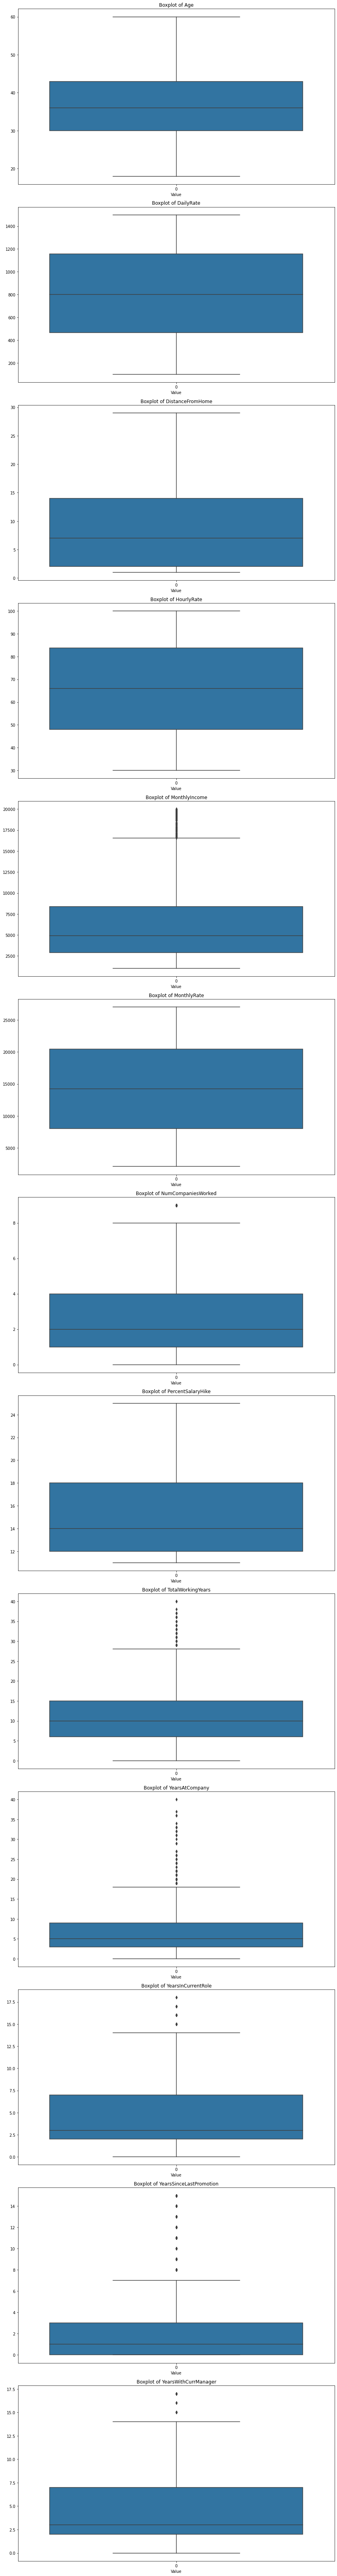

In [25]:
fig, axes = plt.subplots(len(column_list_other), 1, figsize=(12, 7 * len(column_list_other)), sharex=False)

# Step 1: Show Boxplots for each selected feature
for i, feature in enumerate(column_list_other):
    sb.boxplot(data=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('Value')

plt.tight_layout()
plt.show()

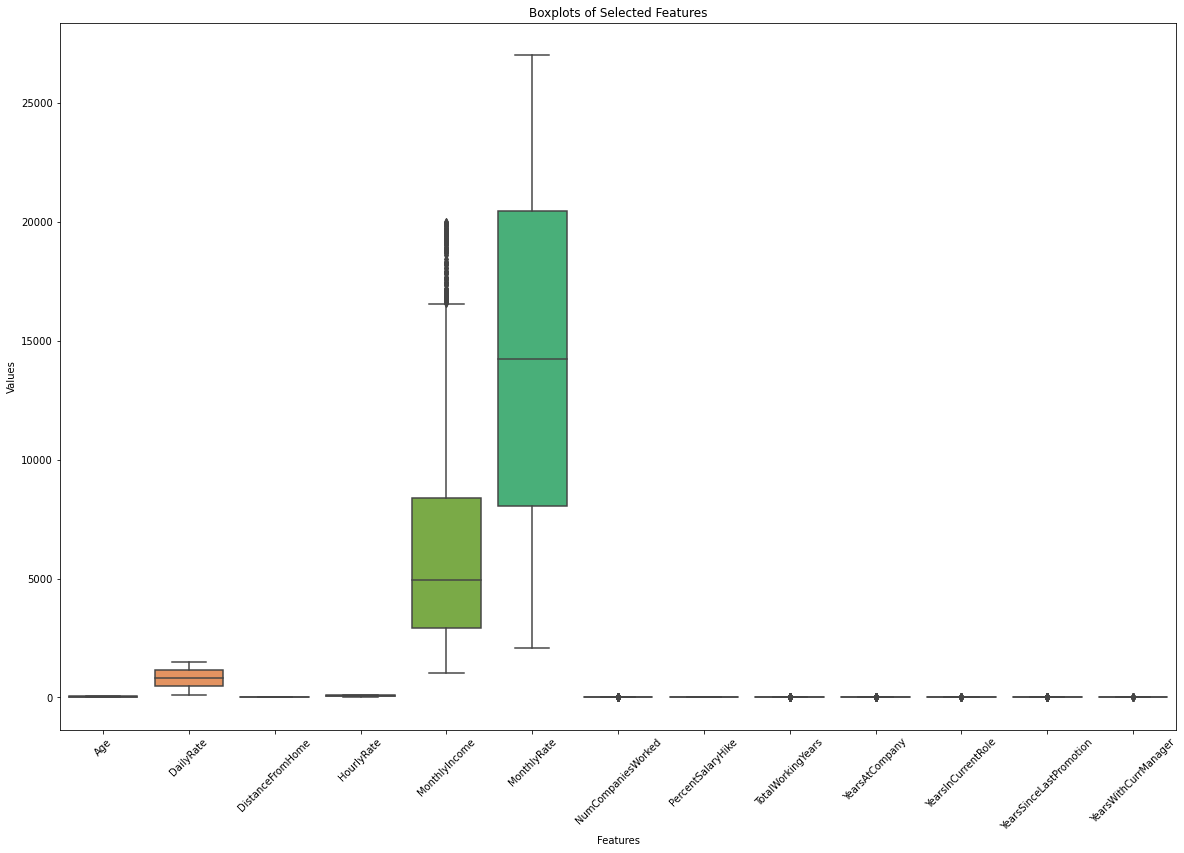

In [26]:
subset_df = df[column_list_other]

# Plot boxplots for each selected feature
plt.figure(figsize=(20, 13))
sb.boxplot(data=subset_df)
plt.title('Boxplots of Selected Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [27]:
(df["MonthlyIncome"].values > 15000).sum()

133

- Better to use flooring instead of removing samples since we may loose many number of rows from the dataset

In [28]:
def floor_outliers_iqr(df1, feature):
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to handle outliers 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply flooring (lower bound) and ceiling (upper bound) for outliers
    df1[feature] = df1[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df1

# Handle outliers for each selected feature
for feature in column_list_other:
    df1 = floor_outliers_iqr(df1, feature)

# Display the DataFrame after handling outliers by flooring
print("DataFrame after handling outliers by flooring:")

df1

DataFrame after handling outliers by flooring:


,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,2,2,2,1,2,0,3,2,7,4,...,5993.0,19479,8.0,11,8.0,6.0,4.0,0.0,5.0,1
1,1,1,1,1,3,1,2,2,6,2,...,5130.0,24907,1.0,23,10.0,10.0,7.0,1.0,7.0,0
2,2,1,2,4,4,1,2,1,2,3,...,2090.0,2396,6.0,15,7.0,0.0,0.0,0.0,0.0,1
3,1,1,4,1,4,0,3,1,6,3,...,2909.0,23159,1.0,11,8.0,8.0,7.0,3.0,0.0,0
4,2,1,1,3,1,1,3,1,2,2,...,3468.0,16632,8.5,12,6.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,2,3,3,1,4,2,2,4,...,2571.0,12290,4.0,17,17.0,5.0,2.0,0.0,3.0,0
1466,2,1,1,3,4,1,2,3,0,1,...,9991.0,21457,4.0,15,9.0,7.0,7.0,1.0,7.0,0
1467,2,1,3,1,2,1,4,2,4,2,...,6142.0,5174,1.0,20,6.0,6.0,2.0,0.0,3.0,0
1468,1,2,3,3,4,1,2,2,7,2,...,5390.0,13243,2.0,14,17.0,9.0,6.0,0.0,8.0,0


In [29]:
df1[column_list_other].describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6361.891837,14313.103401,2.675510,15.209524,11.103061,6.617687,4.207823,1.922789,4.107483
std,9.135373,403.509100,8.106864,20.329428,4353.345470,7117.786044,2.454656,3.659938,7.303828,4.989788,3.555335,2.478222,3.517487
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,16581.000000,26999.000000,8.500000,25.000000,28.500000,18.000000,14.500000,7.500000,14.500000


## Feature Visualizations

- Let us visualize ordinal and nominal features with value counts

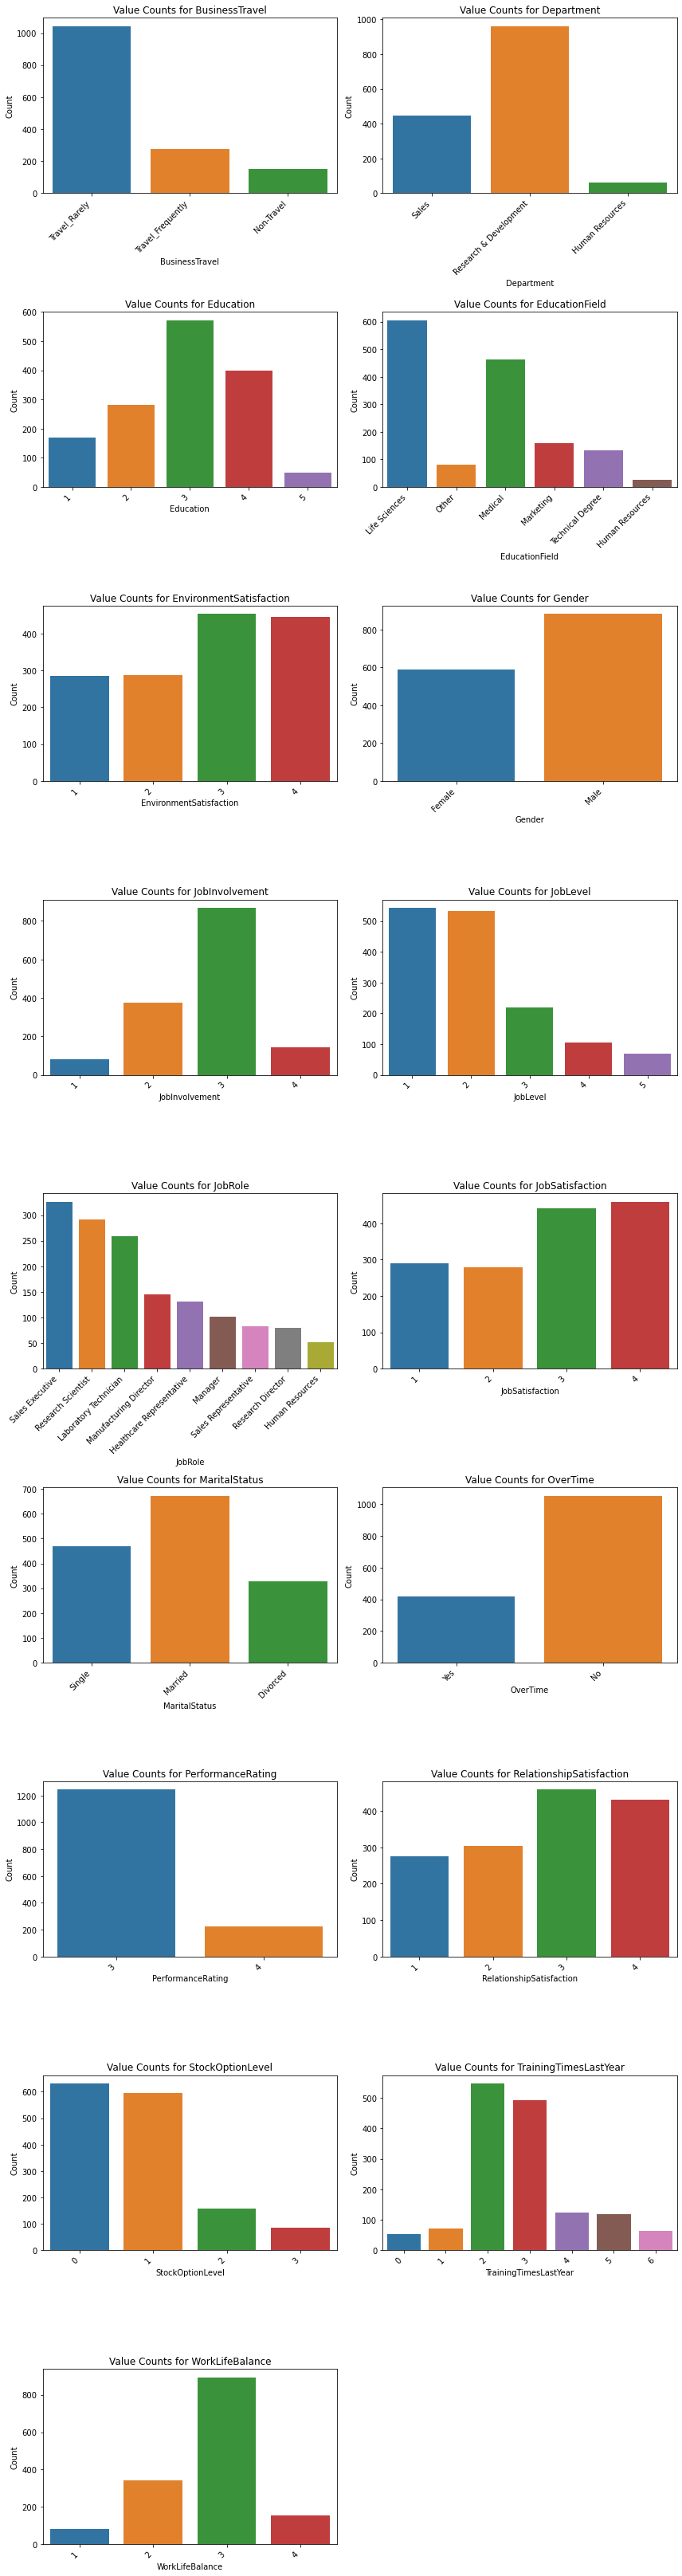

In [30]:
num_rows = len(column_list_rank) // 2 + len(column_list_rank) % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot value counts for each selected feature using Seaborn
for i, feature in enumerate(column_list_rank):
    ax = axes[i]
    sb.countplot(data=df, x=feature, ax=ax)
    ax.set_title(f'Value Counts for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any remaining empty subplots
for i in range(len(column_list_rank), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

- Let us visualize target feature with value counts

<AxesSubplot:xlabel='Attrition', ylabel='count'>

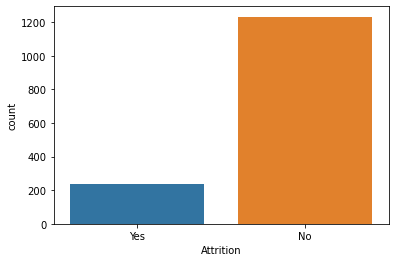

In [31]:
sb.countplot(data=df, x="Attrition")

- We can see that the two classes are imbalanced.

In [32]:
X = pd.concat([df1[column_list_rank], df1[column_list_other]], axis=1)

In [33]:
y = df1[target]

In [34]:
X

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,2,2,1,2,0,3,2,7,4,...,94,5993.0,19479,8.0,11,8.0,6.0,4.0,0.0,5.0
1,1,1,1,1,3,1,2,2,6,2,...,61,5130.0,24907,1.0,23,10.0,10.0,7.0,1.0,7.0
2,2,1,2,4,4,1,2,1,2,3,...,92,2090.0,2396,6.0,15,7.0,0.0,0.0,0.0,0.0
3,1,1,4,1,4,0,3,1,6,3,...,56,2909.0,23159,1.0,11,8.0,8.0,7.0,3.0,0.0
4,2,1,1,3,1,1,3,1,2,2,...,40,3468.0,16632,8.5,12,6.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,2,3,3,1,4,2,2,4,...,41,2571.0,12290,4.0,17,17.0,5.0,2.0,0.0,3.0
1466,2,1,1,3,4,1,2,3,0,1,...,42,9991.0,21457,4.0,15,9.0,7.0,7.0,1.0,7.0
1467,2,1,3,1,2,1,4,2,4,2,...,87,6142.0,5174,1.0,20,6.0,6.0,2.0,0.0,3.0
1468,1,2,3,3,4,1,2,2,7,2,...,63,5390.0,13243,2.0,14,17.0,9.0,6.0,0.0,8.0


In [35]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [36]:
corr = df1[column_list_other].corr()

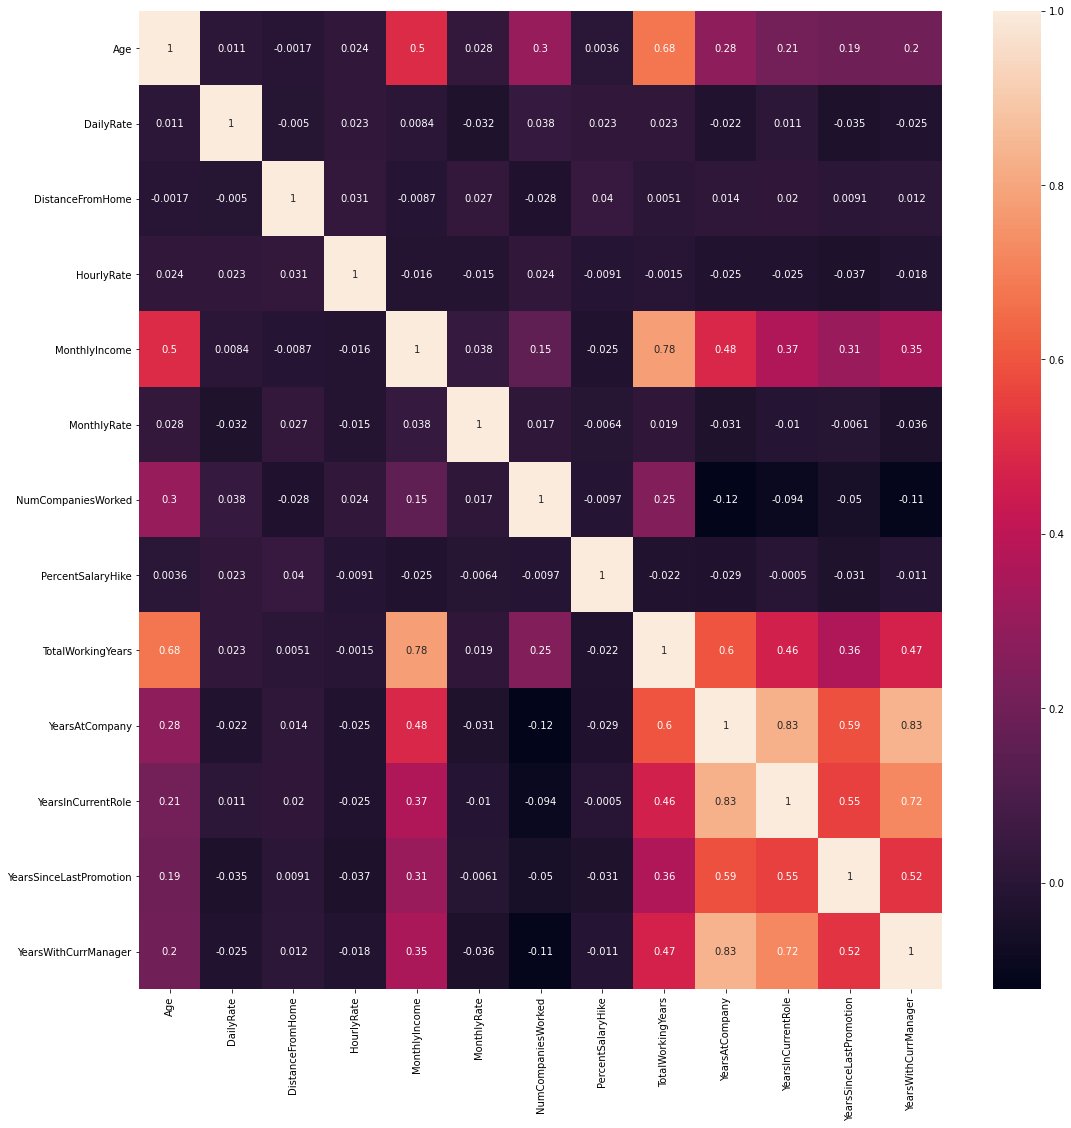

In [37]:
plt.figure(figsize = (18, 18))
sb.heatmap(corr, annot=True)
plt.show()

## Data Resampling to Solve Imbalanced Class Problem

- We will use Random Oversampling and Eandom Undesampling to overcome imbalanced class problem

### 1. Random Oversampling

In [38]:
#Normalizing the features
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [39]:
X[0]

array([1.        , 1.        , 0.25      , 0.2       , 0.33333333,
       0.        , 0.66666667, 0.25      , 0.875     , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.54761905, 0.71581961, 0.        ,
       0.91428571, 0.32006165, 0.6980526 , 0.94117647, 0.        ,
       0.28070175, 0.33333333, 0.27586207, 0.        , 0.34482759])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#Train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
ro = RandomOverSampler(random_state=0)
X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)

In [42]:
y = 0
n = 0

for i in y_train_ro.values:
    if i == 1:
        y = y + 1
    else:
        n = n + 1
        
print(f"Number of No's is {n} and number of Yes's is {y}")

Number of No's is 986 and number of Yes's is 986


### 2. Random Undersampling

In [43]:
ru = RandomUnderSampler(random_state=0)
X_train_ru, y_train_ru = ru.fit_resample(X_train, y_train)

In [44]:
y = 0
n = 0

for i in y_train_ru.values:
    if i == 1:
        y = y + 1
    else:
        n = n + 1
        
print(f"Number of No's is {n} and number of Yes's is {y}")

Number of No's is 190 and number of Yes's is 190


## Feature Extraction

In [45]:
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [46]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train_pca, y_train)

SVC(kernel='linear', probability=True)

In [47]:
y_pred_pca = clf.predict(X_test_pca)

In [48]:
accuracy1 = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of original dataset : {accuracy1}")

Accuracy of original dataset : 0.8401360544217688


- We can consider extracted features for classifications as well as without feature extraction

## Classification

In [49]:
#Function to plot confusion matrix
def conf_matrix(labels, algo):
    datasets = ["Original Data", "Oversampled Data", "Undersampled Data", "Feature Extracted Data"]
    for i in range(4):
        cm = confusion_matrix(labels[i][0], labels[i][1])
        sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f"{algo} - {datasets[i]}")
        plt.show()

In [50]:
#Function to plot accuracies
def accu_plot(accuracies, algo):
    datasets = ["Original Data", "Oversampled Data", "Undersampled Data", "Feature Extracted Data"]
    plt.figure(figsize=(10, 6))
    plt.bar(datasets, accuracies, color='skyblue')

    plt.xlabel('Datasets')
    plt.ylabel(f"Accuracy for {algo}")
    plt.title(f"{algo} Accuracies")

    for i in range(len(datasets)):
        plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')

    plt.ylim(0, 1.0) 
    plt.show()

### 1. Support Vector Machine

In [51]:
# Train SVC on original data
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

# Train SVC on randomly oversampled data
clf_ro = SVC(kernel='linear', probability=True)
clf_ro.fit(X_train_ro, y_train_ro)

# Train SVC on randomly undersampled data
clf_ru = SVC(kernel='linear', probability=True)
clf_ru.fit(X_train_ru, y_train_ru)

# Train SVC on feature extracted original data
clf_pca = SVC(kernel='linear', probability=True)
clf_pca.fit(X_train_pca, y_train)

SVC(kernel='linear', probability=True)

In [52]:
y_pred = clf.predict(X_test)
y_pred_ro = clf_ro.predict(X_test)
y_pred_ru = clf_ru.predict(X_test)
y_pred_pca = clf_pca.predict(X_test_pca)

In [53]:
accuracy1_svm = accuracy_score(y_test, y_pred)
accuracy2_svm = accuracy_score(y_test, y_pred_ro)
accuracy3_svm = accuracy_score(y_test, y_pred_ru)
accuracy4_svm = accuracy_score(y_test, y_pred_pca)

In [54]:
print(f"Accuracy of original dataset : {accuracy1_svm}")
print(f"Accuracy of oversampled dataset : {accuracy2_svm}")
print(f"Accuracy of undersampled dataset : {accuracy3_svm}")
print(f"Accuracy of feature extracted dataset : {accuracy4_svm}")

Accuracy of original dataset : 0.8877551020408163
Accuracy of oversampled dataset : 0.7551020408163265
Accuracy of undersampled dataset : 0.7482993197278912
Accuracy of feature extracted dataset : 0.8401360544217688


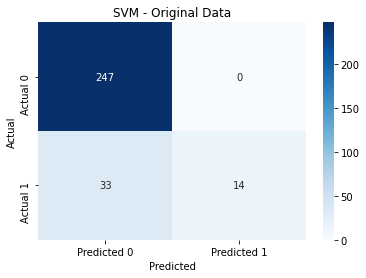

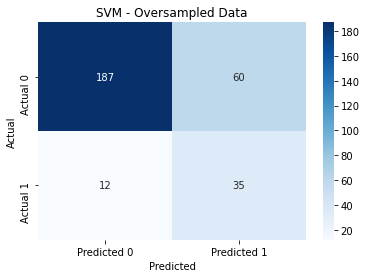

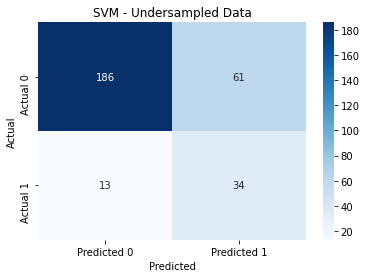

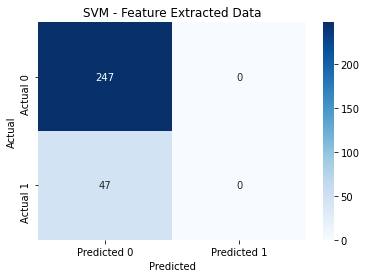

In [55]:
conf_matrix([(y_test, y_pred),(y_test, y_pred_ro),(y_test, y_pred_ru),(y_test, y_pred_pca)], "SVM")

- It is to be noted that even though orifginal dataset gives high accuracies, it most correctly detects 0 class only. So in this case oversampled data can be seen as better datasets for modelling.

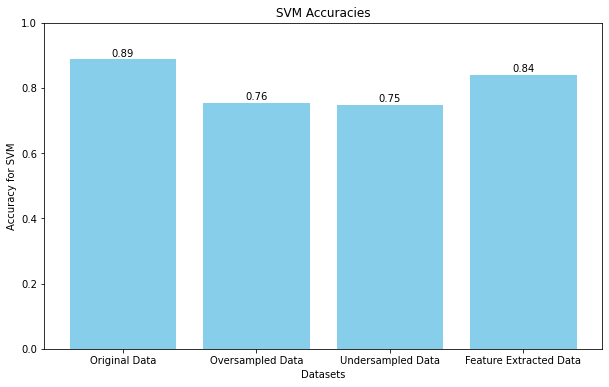

In [56]:
accu_plot([accuracy1_svm, accuracy2_svm, accuracy3_svm, accuracy4_svm], "SVM")

### 2. Logistics Regression

In [57]:
lr = LogisticRegression()
lr_ro = LogisticRegression()
lr_ru = LogisticRegression()
lr_pca = LogisticRegression()

In [58]:
lr.fit(X_train, y_train)
lr_ro.fit(X_train_ro, y_train_ro)
lr_ru.fit(X_train_ru, y_train_ru)
lr_pca.fit(X_train_pca, y_train)

LogisticRegression()

In [59]:
y_pred = lr.predict(X_test)
y_pred_ro = lr_ro.predict(X_test)
y_pred_ru = lr_ru.predict(X_test)
y_pred_pca = lr_pca.predict(X_test_pca)

In [60]:
accuracy1_lr = accuracy_score(y_test, y_pred)
accuracy2_lr = accuracy_score(y_test, y_pred_ro)
accuracy3_lr = accuracy_score(y_test, y_pred_ru)
accuracy4_lr = accuracy_score(y_test, y_pred_pca)

In [61]:
print(f"Accuracy of original dataset : {accuracy1_lr}")
print(f"Accuracy of oversampled dataset : {accuracy2_lr}")
print(f"Accuracy of undersampled dataset : {accuracy3_lr}")
print(f"Accuracy of feature extracted dataset : {accuracy4_lr}")

Accuracy of original dataset : 0.8775510204081632
Accuracy of oversampled dataset : 0.7517006802721088
Accuracy of undersampled dataset : 0.7312925170068028
Accuracy of feature extracted dataset : 0.8401360544217688


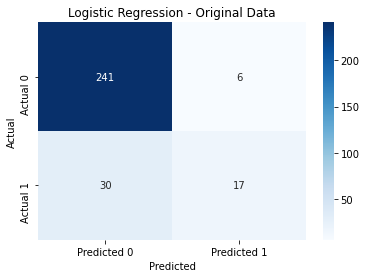

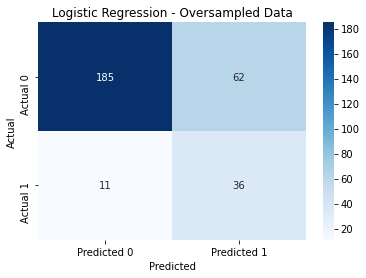

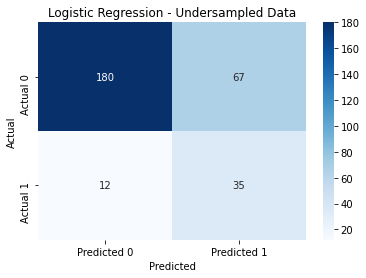

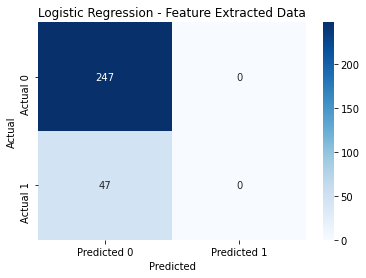

In [62]:
conf_matrix([(y_test, y_pred),(y_test, y_pred_ro),(y_test, y_pred_ru),(y_test, y_pred_pca)], "Logistic Regression")

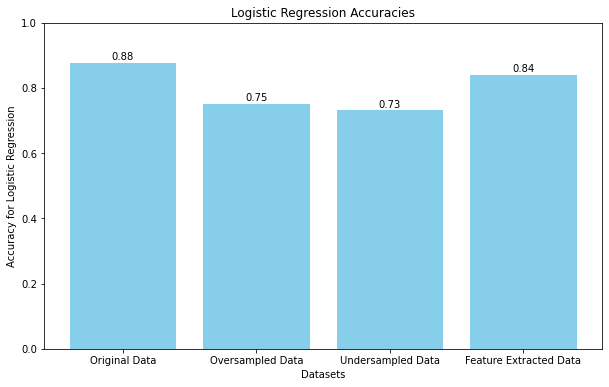

In [63]:
accu_plot([accuracy1_lr, accuracy2_lr, accuracy3_lr, accuracy4_lr], "Logistic Regression")

### 3. Decision Tree

In [64]:
dt = DecisionTreeClassifier()
dt_ro = DecisionTreeClassifier()
dt_ru = DecisionTreeClassifier()
dt_pca = DecisionTreeClassifier()

In [65]:
dt.fit(X_train, y_train)
dt_ro.fit(X_train_ro, y_train_ro)
dt_ru.fit(X_train_ru, y_train_ru)
dt_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [66]:
y_pred = dt.predict(X_test)
y_pred_ro = dt_ro.predict(X_test)
y_pred_ru = dt_ru.predict(X_test)
y_pred_pca = dt_pca.predict(X_test_pca)

In [67]:
accuracy1_dt = accuracy_score(y_test, y_pred)
accuracy2_dt = accuracy_score(y_test, y_pred_ro)
accuracy3_dt = accuracy_score(y_test, y_pred_ru)
accuracy4_dt = accuracy_score(y_test, y_pred_pca)

In [68]:
print(f"Accuracy of original dataset : {accuracy1_dt}")
print(f"Accuracy of oversampled dataset : {accuracy2_dt}")
print(f"Accuracy of undersampled dataset : {accuracy3_dt}")
print(f"Accuracy of feature extracted dataset : {accuracy4_dt}")

Accuracy of original dataset : 0.7857142857142857
Accuracy of oversampled dataset : 0.7517006802721088
Accuracy of undersampled dataset : 0.5782312925170068
Accuracy of feature extracted dataset : 0.6564625850340136


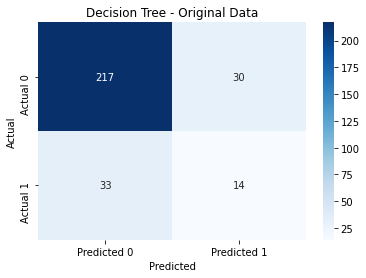

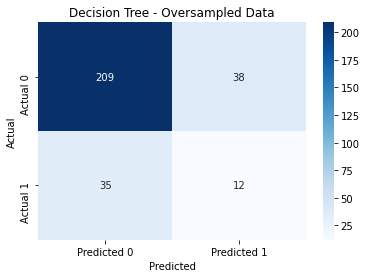

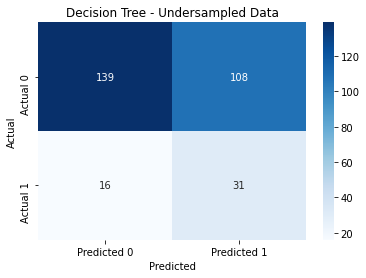

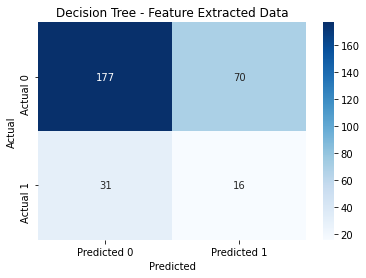

In [69]:
conf_matrix([(y_test, y_pred),(y_test, y_pred_ro),(y_test, y_pred_ru),(y_test, y_pred_pca)], "Decision Tree")

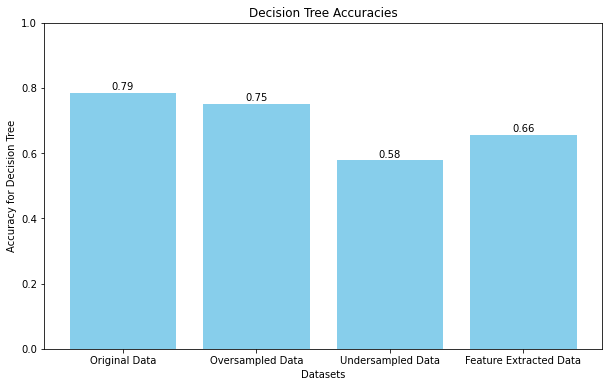

In [70]:
accu_plot([accuracy1_dt, accuracy2_dt, accuracy3_dt, accuracy4_dt], "Decision Tree")

### 4. Random Forest

In [71]:
rf = RandomForestClassifier()
rf_ro = RandomForestClassifier()
rf_ru = RandomForestClassifier()
rf_pca = RandomForestClassifier()

In [72]:
rf.fit(X_train, y_train)
rf_ro.fit(X_train_ro, y_train_ro)
rf_ru.fit(X_train_ru, y_train_ru)
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier()

In [73]:
y_pred = rf.predict(X_test)
y_pred_ro = rf_ro.predict(X_test)
y_pred_ru = rf_ru.predict(X_test)
y_pred_pca = rf_pca.predict(X_test_pca)

In [74]:
accuracy1_rf = accuracy_score(y_test, y_pred)
accuracy2_rf = accuracy_score(y_test, y_pred_ro)
accuracy3_rf = accuracy_score(y_test, y_pred_ru)
accuracy4_rf = accuracy_score(y_test, y_pred_pca)

In [75]:
print(f"Accuracy of original dataset : {accuracy1_rf}")
print(f"Accuracy of oversampled dataset : {accuracy2_rf}")
print(f"Accuracy of undersampled dataset : {accuracy3_rf}")
print(f"Accuracy of feature extracted dataset : {accuracy4_rf}")

Accuracy of original dataset : 0.8367346938775511
Accuracy of oversampled dataset : 0.8299319727891157
Accuracy of undersampled dataset : 0.7414965986394558
Accuracy of feature extracted dataset : 0.7414965986394558


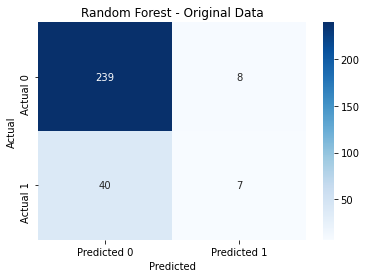

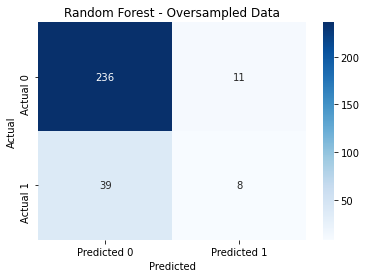

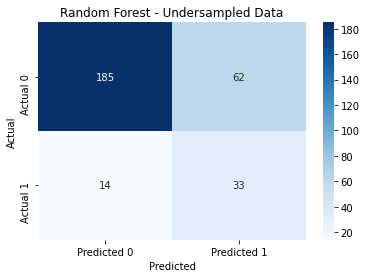

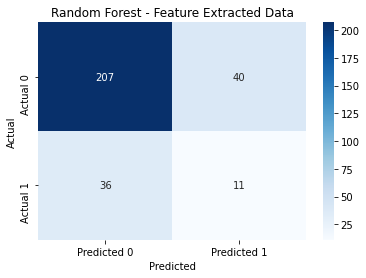

In [76]:
conf_matrix([(y_test, y_pred),(y_test, y_pred_ro),(y_test, y_pred_ru),(y_test, y_pred_pca)], "Random Forest")

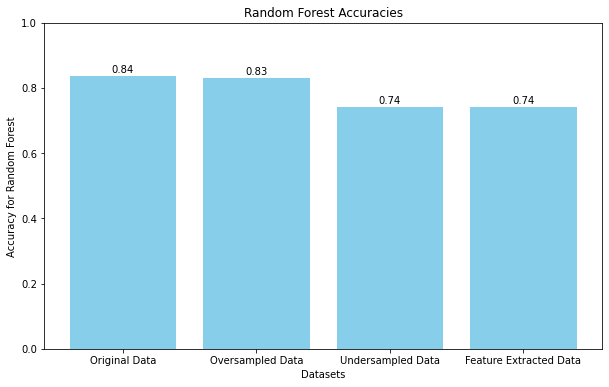

In [77]:
accu_plot([accuracy1_rf, accuracy2_rf, accuracy3_rf, accuracy4_rf], "Random Forest")

### 5. XG-Boost

In [78]:
xg = xgb.XGBClassifier()
xg_ro = xgb.XGBClassifier()
xg_ru = xgb.XGBClassifier()
xg_pca = xgb.XGBClassifier()

In [79]:
xg.fit(X_train, y_train)
xg_ro.fit(X_train_ro, y_train_ro)
xg_ru.fit(X_train_ru, y_train_ru)
xg_pca.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [80]:
y_pred = xg.predict(X_test)
y_pred_ro = xg_ro.predict(X_test)
y_pred_ru = xg_ru.predict(X_test)
y_pred_pca = xg_pca.predict(X_test_pca)

In [81]:
accuracy1_xg = accuracy_score(y_test, y_pred)
accuracy2_xg = accuracy_score(y_test, y_pred_ro)
accuracy3_xg = accuracy_score(y_test, y_pred_ru)
accuracy4_xg = accuracy_score(y_test, y_pred_pca)

In [82]:
print(f"Accuracy of original dataset : {accuracy1_xg}")
print(f"Accuracy of oversampled dataset : {accuracy2_xg}")
print(f"Accuracy of undersampled dataset : {accuracy3_xg}")
print(f"Accuracy of feature extracted dataset : {accuracy4_xg}")

Accuracy of original dataset : 0.8503401360544217
Accuracy of oversampled dataset : 0.8639455782312925
Accuracy of undersampled dataset : 0.7346938775510204
Accuracy of feature extracted dataset : 0.7619047619047619


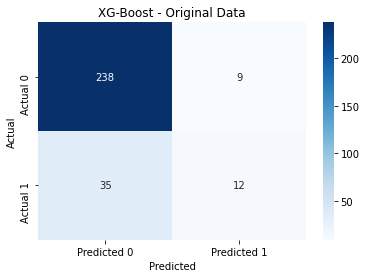

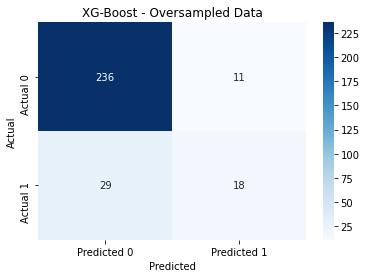

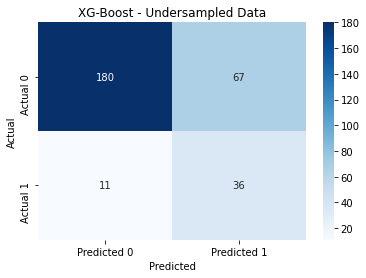

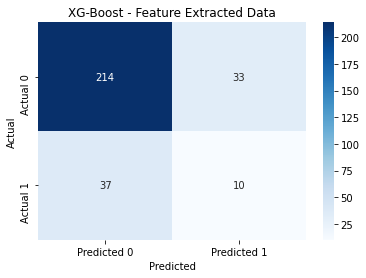

In [83]:
conf_matrix([(y_test, y_pred),(y_test, y_pred_ro),(y_test, y_pred_ru),(y_test, y_pred_pca)], "XG-Boost")

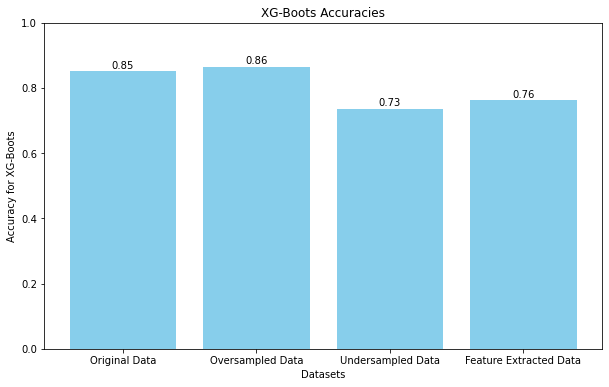

In [84]:
accu_plot([accuracy1_xg, accuracy2_xg, accuracy3_xg, accuracy4_xg], "XG-Boots")

### 6. KNN - Classifier

- We will check our accuracies with k values in the range 1 - 10

In [86]:
k_values = list(range(1, 11)) 

accuracy_scores = {}
k_val = []
acc_val = []
max_accuracy = 0
labels = []
accus = []

for k in k_values:
    accu = []
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_ro = KNeighborsClassifier(n_neighbors=k)
    knn_ru = KNeighborsClassifier(n_neighbors=k)
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    knn_ro.fit(X_train_ro, y_train_ro)
    knn_ru.fit(X_train_ru, y_train_ru)
    knn_pca.fit(X_train_pca, y_train)
    
    y_pred = knn.predict(X_test)
    y_pred_ro = knn_ro.predict(X_test)
    y_pred_ru = knn_ru.predict(X_test)
    y_pred_pca = knn_pca.predict(X_test_pca)
    
    knn1 = accuracy_score(y_test, y_pred)
    knn2 = accuracy_score(y_test, y_pred_ro)
    knn3 = accuracy_score(y_test, y_pred_ru)
    knn4 = accuracy_score(y_test, y_pred_pca)
    
    if knn1 > max_accuracy:
        labels.clear()
        labels.append((y_test, y_pred))
        labels.append((y_test, y_pred_ro))
        labels.append((y_test, y_pred_ru))
        labels.append((y_test, y_pred_pca))
        
        accus.clear()
        accus.append(knn1)
        accus.append(knn2)
        accus.append(knn3)
        accus.append(knn4)
    
    accu.append(knn1)
    accu.append(knn2)
    accu.append(knn3)
    accu.append(knn4)
    
    k_val.append(k)
    acc_val.append(knn1)
    
    accuracy_scores[k] = accu

In [87]:
#Displaying all accuraries values for 4 datasets for each k
accuracy_scores

{1: [0.7857142857142857,
  0.7857142857142857,
  0.6768707482993197,
  0.6938775510204082],
 2: [0.8333333333333334,
  0.7857142857142857,
  0.7925170068027211,
  0.8095238095238095],
 3: [0.8469387755102041,
  0.7857142857142857,
  0.7312925170068028,
  0.7959183673469388],
 4: [0.8401360544217688,
  0.7891156462585034,
  0.7687074829931972,
  0.826530612244898],
 5: [0.8469387755102041,
  0.7448979591836735,
  0.7108843537414966,
  0.8197278911564626],
 6: [0.8435374149659864,
  0.7619047619047619,
  0.7687074829931972,
  0.8367346938775511],
 7: [0.8537414965986394,
  0.7414965986394558,
  0.7108843537414966,
  0.8367346938775511],
 8: [0.8435374149659864,
  0.7653061224489796,
  0.7585034013605442,
  0.8333333333333334],
 9: [0.8401360544217688,
  0.7448979591836735,
  0.7210884353741497,
  0.8367346938775511],
 10: [0.8503401360544217,
  0.7653061224489796,
  0.7891156462585034,
  0.8333333333333334]}

- Let's fing out the best k value according to the accuracy values on the original datatset

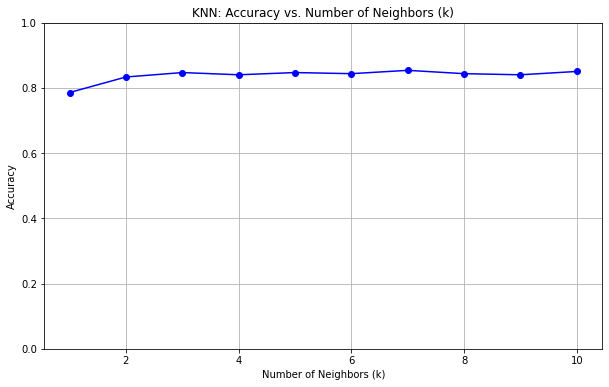

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(k_val, acc_val, marker='o', linestyle='-', color='b')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs. Number of Neighbors (k)')

# Show the plot
plt.grid(True)
plt.ylim(0, 1.0)
plt.show()

- Highest acuuracy is given when k = 7

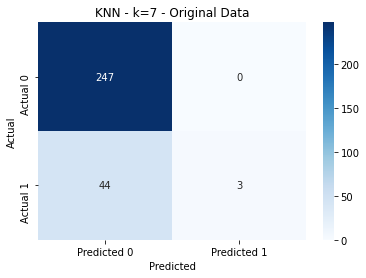

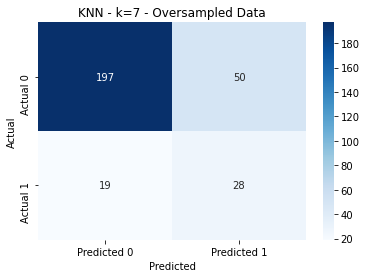

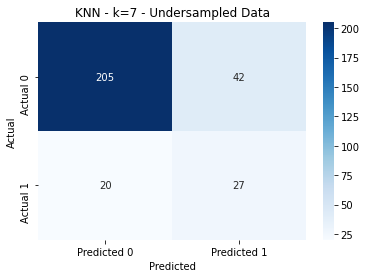

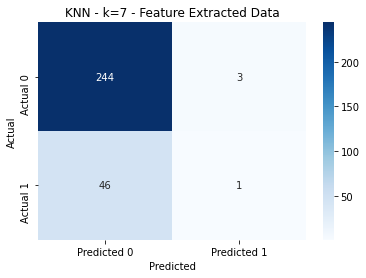

In [89]:
conf_matrix(labels, "KNN - k=7")

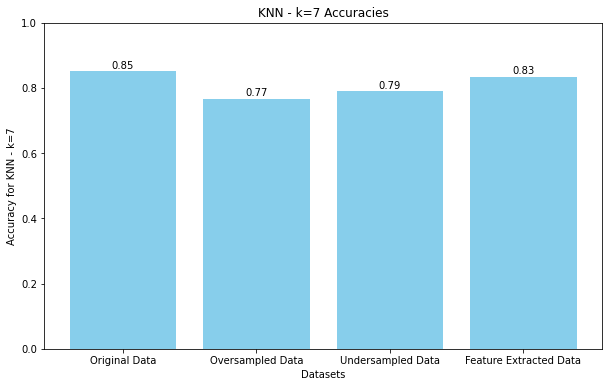

In [90]:
accu_plot(accus, "KNN - k=7")

### 7. Simple ANN

In [91]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,281
Trainable params: 13,281
Non-trainable params: 0
_________________________________________________________________


In [92]:
history1 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/50
37/37 [==============================] - 1s 10ms/step - loss: 0.4740 - accuracy: 0.8146 - val_loss: 0.4209 - val_accuracy: 0.8401
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8384 - val_loss: 0.3793 - val_accuracy: 0.8401
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 0.3616 - accuracy: 0.8537 - val_loss: 0.3470 - val_accuracy: 0.8605
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8690 - val_loss: 0.3394 - val_accuracy: 0.8707
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8656 - val_loss: 0.3298 - val_accuracy: 0.8776
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8784 - val_loss: 0.3304 - val_accuracy: 0.8741
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.8844 - val_loss: 0.3312 - val_accuracy: 0.8810
Epoch 8/50
37/37 [=

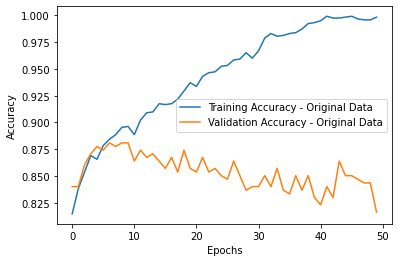

10/10 [==============================] - 0s 279us/step
Accuracy :  0.8163265306122449


In [93]:
plt.plot(history1.history['accuracy'], label='Training Accuracy - Original Data')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy - Original Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model and print final accuracy
y_pred = (model.predict(X_test) > 0.5).astype("int32").reshape(-1)
accuracy1_ann = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy1_ann)

In [94]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ro.shape[1],)),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,281
Trainable params: 13,281
Non-trainable params: 0
_________________________________________________________________


In [95]:
history2 = model.fit(X_train_ro, y_train_ro, epochs=50, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/50
62/62 [==============================] - 1s 4ms/step - loss: 0.6276 - accuracy: 0.6998 - val_loss: 0.6042 - val_accuracy: 0.6735
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7632 - val_loss: 0.4362 - val_accuracy: 0.8061
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7875 - val_loss: 0.3881 - val_accuracy: 0.8367
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8109 - val_loss: 0.4562 - val_accuracy: 0.7891
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8271 - val_loss: 0.4483 - val_accuracy: 0.7891
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8509 - val_loss: 0.3955 - val_accuracy: 0.8401
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8778 - val_loss: 0.3487 - val_accuracy: 0.8844
Epoch 8/50
62/62 [==

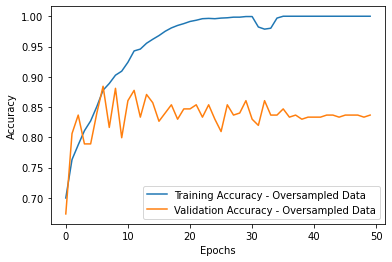

10/10 [==============================] - 0s 1ms/step
Accuracy :  0.8367346938775511


In [96]:
plt.plot(history2.history['accuracy'], label='Training Accuracy - Oversampled Data')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy - Oversampled Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model and print final accuracy
y_pred_ro = (model.predict(X_test) > 0.5).astype("int32").reshape(-1)
accuracy2_ann = accuracy_score(y_test, y_pred_ro)
print("Accuracy : ", accuracy2_ann)

In [106]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ru.shape[1],)),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               3968      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 16)                1040      
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,281
Trainable params: 13,281
Non-trainable params: 0
_________________________________________________________________


In [107]:
history3 = model.fit(X_train_ru, y_train_ru, epochs=50, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/50
12/12 [==============================] - 1s 13ms/step - loss: 0.6853 - accuracy: 0.5342 - val_loss: 0.6322 - val_accuracy: 0.7211
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6277 - accuracy: 0.7079 - val_loss: 0.5978 - val_accuracy: 0.7109
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.7474 - val_loss: 0.5921 - val_accuracy: 0.6905
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5540 - accuracy: 0.7447 - val_loss: 0.6477 - val_accuracy: 0.6293
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5230 - accuracy: 0.7474 - val_loss: 0.4686 - val_accuracy: 0.7891
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5016 - accuracy: 0.7789 - val_loss: 0.5809 - val_accuracy: 0.6905
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.7895 - val_loss: 0.6055 - val_accuracy: 0.6837
Epoch 8/50
12/12 [=

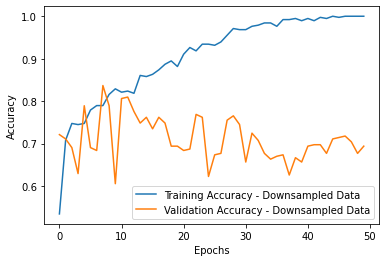

10/10 [==============================] - 0s 942us/step
Accuracy :  0.6938775510204082


In [108]:
plt.plot(history3.history['accuracy'], label='Training Accuracy - Downsampled Data')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy - Downsampled Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model and print final accuracy
y_pred_ru = (model.predict(X_test) > 0.5).astype("int32").reshape(-1)
accuracy3_ann = accuracy_score(y_test, y_pred_ru)
print("Accuracy : ", accuracy3_ann)

In [109]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               384       
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 16)                1040      
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,697
Trainable params: 9,697
Non-trainable params: 0
_________________________________________________________________


In [110]:
history4 = model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/50
37/37 [==============================] - 1s 5ms/step - loss: 0.5150 - accuracy: 0.8384 - val_loss: 0.4388 - val_accuracy: 0.8401
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8384 - val_loss: 0.4331 - val_accuracy: 0.8401
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8384 - val_loss: 0.4356 - val_accuracy: 0.8401
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8384 - val_loss: 0.4328 - val_accuracy: 0.8401
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8401 - val_loss: 0.4487 - val_accuracy: 0.8095
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8461 - val_loss: 0.4642 - val_accuracy: 0.8027
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8393 - val_loss: 0.4554 - val_accuracy: 0.7925
Epoch 8/50
37/37 [==

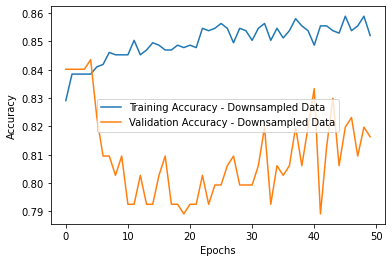

10/10 [==============================] - 0s 2ms/step
Accuracy :  0.8163265306122449


In [102]:
plt.plot(history4.history['accuracy'], label='Training Accuracy - Downsampled Data')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy - Downsampled Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model and print final accuracy
y_pred_pca = (model.predict(X_test_pca) > 0.5).astype("int32").reshape(-1)
accuracy4_ann = accuracy_score(y_test, y_pred_pca)
print("Accuracy : ", accuracy4_ann)

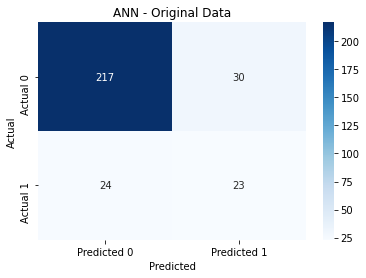

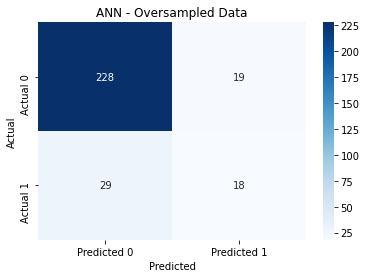

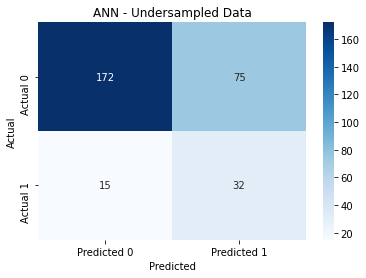

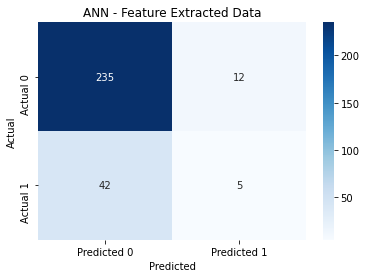

In [111]:
conf_matrix([(y_test, y_pred),(y_test, y_pred_ro),(y_test, y_pred_ru),(y_test, y_pred_pca)], "ANN")

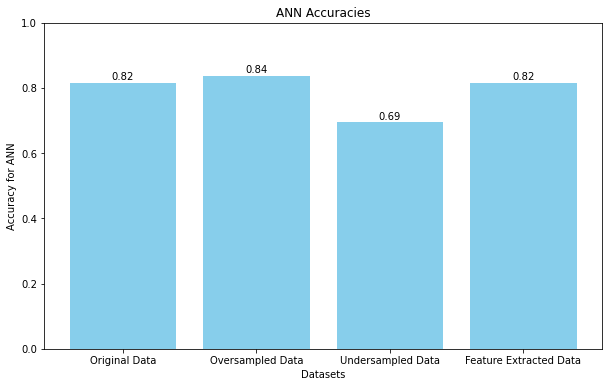

In [112]:
accu_plot([accuracy1_ann, accuracy2_ann, accuracy3_ann, accuracy4_ann], "ANN")

## Model Comparison

- We will seperately compare accuracy values that we have already obtained.

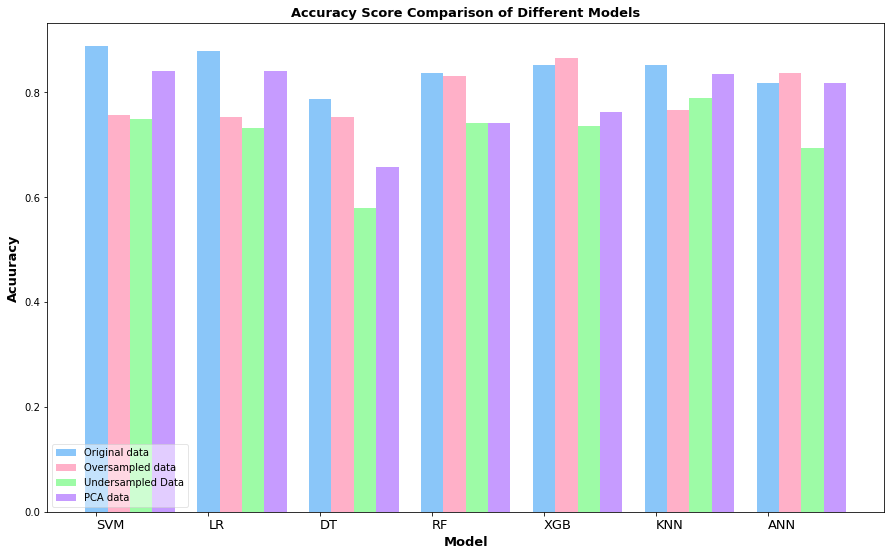

In [113]:
colors = ['#8AC6F9', '#FFB0C8', '#9DFBA6', '#C69BFF']
accuracy = [[accuracy1_svm, accuracy2_svm, accuracy3_svm, accuracy4_svm],
           [accuracy1_lr, accuracy2_lr, accuracy3_lr, accuracy4_lr],
           [accuracy1_dt, accuracy2_dt, accuracy3_dt, accuracy4_dt],
           [accuracy1_rf, accuracy2_rf, accuracy3_rf, accuracy4_rf],
           [accuracy1_xg, accuracy2_xg, accuracy3_xg, accuracy4_xg],
           accus,
           [accuracy1_ann, accuracy2_ann, accuracy3_ann, accuracy4_ann]]
accuracy = np.array(accuracy)


classi = ['SVM', 'LR', 'DT', 'RF', 'XGB', 'KNN', 'ANN']
models = ['Original data', 'Oversampled data', 'Undersampled Data', 'PCA data']

# Step 3: Create a bar chart using plt.bar() function
x = np.arange(len(classi))
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 9))

for i in range(len(models)):
    ax.bar(x + i * width, accuracy[:, i], width, label=models[i], color=colors[i])

# Step 4: Customize the chart
ax.set_title('Accuracy Score Comparison of Different Models', fontweight='bold', fontsize=13)
ax.set_xlabel('Model', fontweight='bold', fontsize=13)
ax.set_ylabel('Acuuracy', fontweight='bold', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(classi, ha='left', fontsize=13)
ax.legend(framealpha=0.5, fontsize=10, loc='lower left')

plt.show()

## Conclusion

- We can identify two major issues with the dataset.
    1. Lesser number of overall samples.
    2. Imbalanced class problem is appearing.
 

- We have tried two sampling techniques oversampling and undersampling. Even though both the techniques are not on to the mark when considering the accuracy they obtained training 7 different models, it can be noticed that they predict both the classes without any bias compared to original dataset.

- We have tried PCA with 2 principal components, but the original dataset worked better with the classification models.

- It can be noticed that SVM classifier gives the highest accuracy with respect to the original dataset. 

- Overall, ANN seems to be more accurate except for undersampled dataset and gives quiet good accuracies for all the datasets.

-------------------------------------------------------------------------------------------------------------------------------